In [24]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("troop_movements.csv")

In [6]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-10 15:32:03,1,tie_fighter,empire,6,10,9,7,Aleen Minor
1,2024-07-10 15:32:02,2,unknown,empire,7,8,8,8,Mon Cala
2,2024-07-10 15:32:01,3,x-wing,resistance,7,3,8,3,Tatooine
3,2024-07-10 15:32:00,4,tie_silencer,empire,6,8,2,7,Aleen Minor
4,2024-07-10 15:31:59,5,unknown,resistance,5,4,4,7,Shili


In [9]:
for columnname in df.columns:
    print(df[columnname].value_counts())

timestamp
2024-07-10 15:32:03    1
2024-07-10 15:20:52    1
2024-07-10 15:21:05    1
2024-07-10 15:21:04    1
2024-07-10 15:21:03    1
                      ..
2024-07-10 15:26:25    1
2024-07-10 15:26:24    1
2024-07-10 15:26:23    1
2024-07-10 15:26:22    1
2024-07-10 15:15:24    1
Name: count, Length: 1000, dtype: int64
unit_id
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
unit_type
tie_silencer          131
tie_fighter           129
x-wing                129
resistance_soldier    127
at-at                 126
stormtrooper          123
at-st                 120
unknown               115
Name: count, dtype: int64
empire_or_resistance
empire        508
resistance    492
Name: count, dtype: int64
location_x
2     113
3     110
8     106
7     103
10    102
9     102
5     100
6      93
1      90
4      81
Name: count, dtype: int64
location_y
8     117
1     117
6     110
10    102
5 

In [ ]:
def isRes(x):
    if x = "resistance":
        return True
    else:
        return False

df["is_resistance"] = isRes(df["empire_or_resistance"])

In [11]:
df["is_resistance"] = df["empire_or_resistance"] == "resistance"

In [12]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-10 15:32:03,1,tie_fighter,empire,6,10,9,7,Aleen Minor,False
1,2024-07-10 15:32:02,2,unknown,empire,7,8,8,8,Mon Cala,False
2,2024-07-10 15:32:01,3,x-wing,resistance,7,3,8,3,Tatooine,True
3,2024-07-10 15:32:00,4,tie_silencer,empire,6,8,2,7,Aleen Minor,False
4,2024-07-10 15:31:59,5,unknown,resistance,5,4,4,7,Shili,True


Text(0.5, 1.0, 'Empire and Resistance Dist')

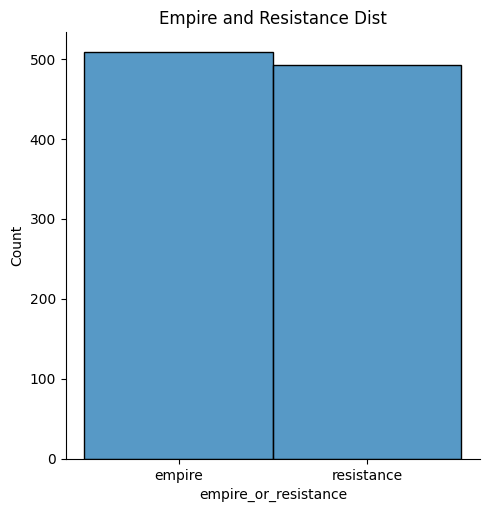

In [22]:
sns.displot(x="empire_or_resistance", data=df)
# sns.set_theme("ggplot")
plt.pyplot.title("Empire and Resistance Dist")

In [29]:
df.dtypes

timestamp               object
unit_id                  int64
unit_type               object
empire_or_resistance    object
location_x               int64
location_y               int64
destination_x            int64
destination_y            int64
homeworld               object
is_resistance             bool
dtype: object

In [34]:
df2 =pd.get_dummies(df,columns = ["homeworld","unit_type"])

In [35]:
df2.columns

Index(['timestamp', 'unit_id', 'empire_or_resistance', 'location_x',
       'location_y', 'destination_x', 'destination_y', 'is_resistance',
       'homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
    

In [36]:
feature_cols = ['homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
       'homeworld_Trandosha', 'homeworld_Troiken', 'homeworld_Tund',
       'homeworld_Umbara', 'homeworld_Vulpter', 'homeworld_Zolan',
       'unit_type_at-at', 'unit_type_at-st', 'unit_type_resistance_soldier',
       'unit_type_stormtrooper', 'unit_type_tie_fighter',
       'unit_type_tie_silencer', 'unit_type_unknown', 'unit_type_x-wing']
X = df2[feature_cols]
y = df2.is_resistance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [37]:
X_train.dtypes

homeworld_Alderaan              bool
homeworld_Aleen Minor           bool
homeworld_Bestine IV            bool
homeworld_Cerea                 bool
homeworld_Champala              bool
homeworld_Chandrila             bool
homeworld_Concord Dawn          bool
homeworld_Corellia              bool
homeworld_Dagobah               bool
homeworld_Dathomir              bool
homeworld_Dorin                 bool
homeworld_Eriadu                bool
homeworld_Glee Anselm           bool
homeworld_Haruun Kal            bool
homeworld_Iktotch               bool
homeworld_Iridonia              bool
homeworld_Kalee                 bool
homeworld_Kashyyyk              bool
homeworld_Malastare             bool
homeworld_Mirial                bool
homeworld_Mon Cala              bool
homeworld_Muunilinst            bool
homeworld_Naboo                 bool
homeworld_Ojom                  bool
homeworld_Quermia               bool
homeworld_Rodia                 bool
homeworld_Ryloth                bool
h

In [38]:
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train,y_train)

cross_val_score(clf, X_test, y_test, cv=10)

array([0.53333333, 0.4       , 0.33333333, 0.66666667, 0.6       ,
       0.66666667, 0.2       , 0.46666667, 0.4       , 0.6       ])

importances = clf.feature_importances_

In [40]:
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

Text(0.5, 1.0, 'Feature Importances')

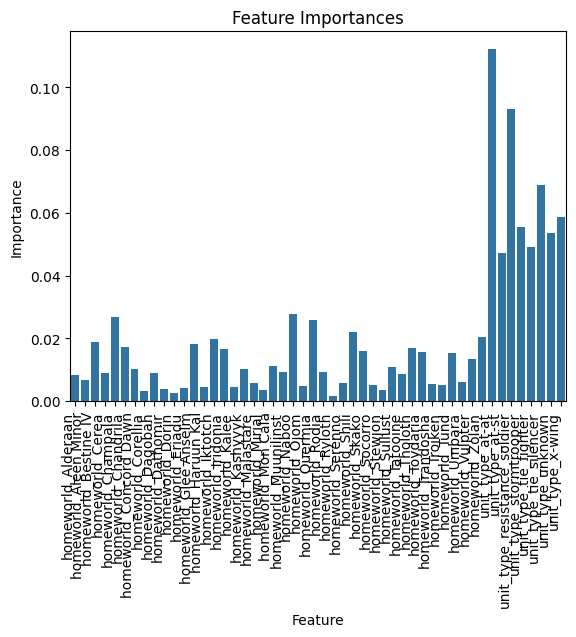

In [46]:
feature_importance.sort_values(by=['Importance'])
sns.barplot(x="Feature", y="Importance", data=feature_importance )
plt.pyplot.xticks(rotation=90, ha='right')
plt.pyplot.title("Feature Importances")